Saving images.jpg to images.jpg


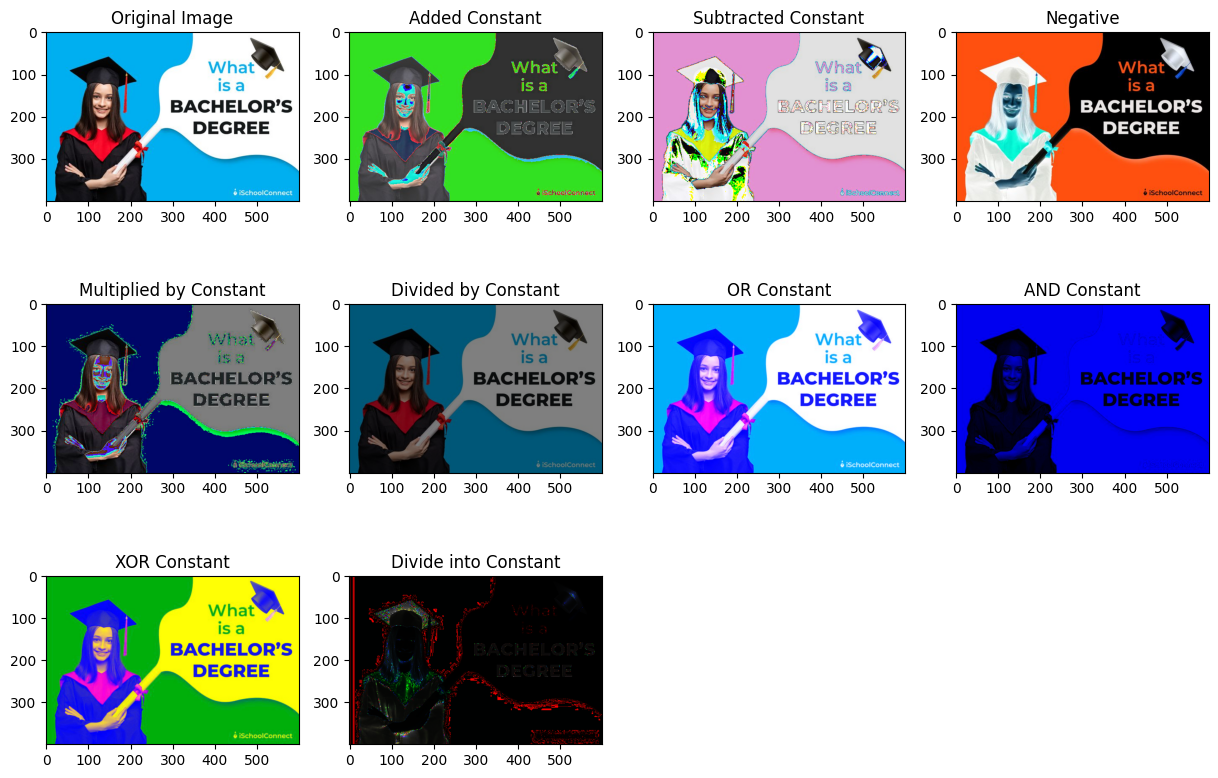

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Prompt the user to upload a file
uploaded = files.upload()

# Assuming you uploaded an image with a specific filename, e.g., "uploaded_image.jpg"
image_path = next(iter(uploaded))
uploaded_image = cv2.imread(image_path)

# Monadic operations on the original color image
operations = [
    ("Original Image", uploaded_image),
    ("Added Constant", uploaded_image + [50, 50, 50]),
    ("Subtracted Constant", uploaded_image - [30, 30, 30]),
    ("Negative", 255 - uploaded_image),
    ("Multiplied by Constant", uploaded_image * [1.5, 1.5, 1.5]),
    ("Divided by Constant", uploaded_image / 2)
]

# Additional operations
constant = 250
or_result = cv2.bitwise_or(uploaded_image, constant)
and_result = cv2.bitwise_and(uploaded_image, constant)
xor_result = cv2.bitwise_xor(uploaded_image, constant)
divided_into_result = np.zeros_like(uploaded_image, dtype=np.float32)
divided_into_result[uploaded_image != 0] = constant / uploaded_image[uploaded_image != 0]

operations.extend([
    ("OR Constant", or_result),
    ("AND Constant", and_result),
    ("XOR Constant", xor_result),
    ("Divide into Constant", divided_into_result)
])

# Display the images after monadic operations
plt.figure(figsize=(15, 10))

for i, (title, img) in enumerate(operations, 1):
    plt.subplot(3, 4, i)
    plt.imshow(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.title(title)

plt.show()